In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

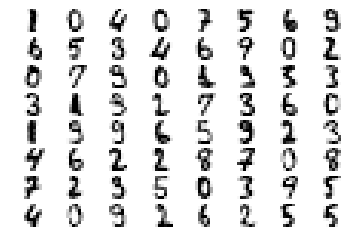

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

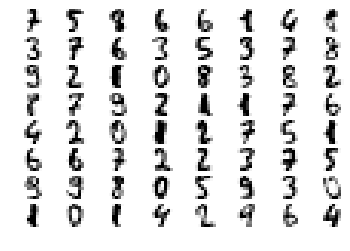

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.09882 stdev: 0.03952
Best fitness: 0.25479 - size: (10, 64) - species 1 - id 164
Average adjusted fitness: 0.097
Mean genetic distance 2.848, standard deviation 0.319
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 16.352 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.10789 stdev: 0.04260
Best fitness: 0.25479 - size: (10, 64) - species 4 - id 164
Average adjusted fitness: 0.091
Mean genetic distance 2.964, standard deviation 0.353
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 16.092 sec (16.222 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.11639 stdev: 0.03954
Best fitness: 0.25479 - size: (10, 64) - species 36 - id 164
Average adjusted fitness: 0.100
Mean genetic distance 2.986, standard deviation 0.362
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 17.351 sec (

Population's average fitness: 0.16648 stdev: 0.05240
Best fitness: 0.32777 - size: (15, 70) - species 7 - id 2852
Average adjusted fitness: 0.137
Mean genetic distance 3.175, standard deviation 0.418
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 21.780 sec (22.078 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.16386 stdev: 0.05604
Best fitness: 0.32777 - size: (15, 70) - species 7 - id 2852
Average adjusted fitness: 0.155
Mean genetic distance 3.185, standard deviation 0.430
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 21.793 sec (21.853 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.16469 stdev: 0.05266
Best fitness: 0.32777 - size: (15, 70) - species 7 - id 2852
Average adjusted fitness: 0.124
Mean genetic distance 3.176, standard deviation 0.434
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 21.678 sec (21.608 average)

 

Population's average fitness: 0.18080 stdev: 0.06690
Best fitness: 0.34694 - size: (17, 71) - species 13 - id 6151
Average adjusted fitness: 0.144
Mean genetic distance 3.173, standard deviation 0.504
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 22.344 sec (23.699 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.18286 stdev: 0.06521
Best fitness: 0.35683 - size: (13, 64) - species 7 - id 7077
Average adjusted fitness: 0.124
Mean genetic distance 3.151, standard deviation 0.501
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 22.710 sec (23.612 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.18408 stdev: 0.06649
Best fitness: 0.35683 - size: (13, 64) - species 7 - id 7077
Average adjusted fitness: 0.138
Mean genetic distance 3.156, standard deviation 0.500
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 21.351 sec (23.339 average)



Population's average fitness: 0.19142 stdev: 0.07167
Best fitness: 0.37539 - size: (14, 65) - species 48 - id 10572
Average adjusted fitness: 0.153
Mean genetic distance 3.175, standard deviation 0.574
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 26.438 sec (24.684 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.18471 stdev: 0.06806
Best fitness: 0.37539 - size: (14, 65) - species 48 - id 10572
Average adjusted fitness: 0.159
Mean genetic distance 3.188, standard deviation 0.605
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 24.606 sec (24.743 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18288 stdev: 0.06668
Best fitness: 0.37539 - size: (14, 65) - species 48 - id 10572
Average adjusted fitness: 0.163
Mean genetic distance 3.218, standard deviation 0.607
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 26.681 sec (24.987 avera

Population's average fitness: 0.18211 stdev: 0.07546
Best fitness: 0.40816 - size: (18, 68) - species 7 - id 14259
Average adjusted fitness: 0.129
Mean genetic distance 3.092, standard deviation 0.598
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 24.503 sec (24.697 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.20199 stdev: 0.07220
Best fitness: 0.40816 - size: (18, 68) - species 7 - id 14259
Average adjusted fitness: 0.179
Mean genetic distance 3.092, standard deviation 0.588
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 26.136 sec (24.884 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.19654 stdev: 0.07323
Best fitness: 0.40816 - size: (18, 68) - species 7 - id 14259
Average adjusted fitness: 0.149
Mean genetic distance 3.064, standard deviation 0.600
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 25.087 sec (24.786 average)

Population's average fitness: 0.20056 stdev: 0.06956
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.165
Mean genetic distance 3.092, standard deviation 0.545
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 27.284 sec (26.216 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.19356 stdev: 0.07330
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.156
Mean genetic distance 3.097, standard deviation 0.535
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 26.720 sec (26.296 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.19804 stdev: 0.06916
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.169
Mean genetic distance 3.076, standard deviation 0.544
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 26.680 sec (26.399 averag

Population's average fitness: 0.20270 stdev: 0.07343
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.163
Mean genetic distance 3.155, standard deviation 0.589
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 26.500 sec (26.421 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.20483 stdev: 0.07347
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.118
Mean genetic distance 3.151, standard deviation 0.600
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 26.521 sec (26.491 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.20575 stdev: 0.07327
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.164
Mean genetic distance 3.154, standard deviation 0.570
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 26.281 sec (26.635 averag

Population's average fitness: 0.20979 stdev: 0.07993
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.169
Mean genetic distance 3.125, standard deviation 0.623
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 29.324 sec (26.811 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.20794 stdev: 0.07965
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.138
Mean genetic distance 3.051, standard deviation 0.626
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 27.466 sec (26.822 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.20496 stdev: 0.07708
Best fitness: 0.42981 - size: (19, 70) - species 7 - id 16084
Average adjusted fitness: 0.140
Mean genetic distance 3.051, standard deviation 0.629
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 27.576 sec (26.814 averag

Population's average fitness: 0.20147 stdev: 0.08106
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.170
Mean genetic distance 3.016, standard deviation 0.597
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 21.180 sec (24.736 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.21162 stdev: 0.08302
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.175
Mean genetic distance 3.016, standard deviation 0.586
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 21.563 sec (23.964 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.21472 stdev: 0.08091
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.174
Mean genetic distance 3.019, standard deviation 0.572
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 25.011 sec (23.628 averag

Population's average fitness: 0.20852 stdev: 0.07541
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.126
Mean genetic distance 3.002, standard deviation 0.644
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 23.639 sec (23.725 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.20244 stdev: 0.07736
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.150
Mean genetic distance 2.990, standard deviation 0.642
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 25.505 sec (23.828 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.20711 stdev: 0.07908
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.141
Mean genetic distance 2.997, standard deviation 0.641
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 23.532 sec (23.712 averag

Population's average fitness: 0.21110 stdev: 0.08010
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.190
Mean genetic distance 3.106, standard deviation 0.547
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 23.258 sec (22.965 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.20611 stdev: 0.08636
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.169
Mean genetic distance 3.106, standard deviation 0.532
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 23.031 sec (22.988 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.20501 stdev: 0.08548
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.172
Mean genetic distance 3.072, standard deviation 0.555
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 22.955 sec (23.016 ave

Population's average fitness: 0.20155 stdev: 0.08089
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.141
Mean genetic distance 2.891, standard deviation 0.546
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.509 sec (23.952 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.20082 stdev: 0.08029
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.163
Mean genetic distance 2.904, standard deviation 0.535
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 24.668 sec (24.118 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.20018 stdev: 0.08380
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.163
Mean genetic distance 2.918, standard deviation 0.494
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 24.348 sec (24.228 avera

Population's average fitness: 0.20330 stdev: 0.08236
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.173
Mean genetic distance 2.872, standard deviation 0.475
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 26.014 sec (25.778 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.20575 stdev: 0.08130
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.137
Mean genetic distance 2.867, standard deviation 0.509
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 26.217 sec (25.842 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.20119 stdev: 0.08924
Best fitness: 0.43105 - size: (24, 75) - species 61 - id 31412
Average adjusted fitness: 0.165
Mean genetic distance 2.872, standard deviation 0.502
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 26.835 sec (25.965 ave

Population's average fitness: 0.20370 stdev: 0.08411
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.168
Mean genetic distance 2.797, standard deviation 0.532
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 24.905 sec (25.128 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.20382 stdev: 0.08255
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.183
Mean genetic distance 2.780, standard deviation 0.575
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 24.828 sec (25.119 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.19785 stdev: 0.08042
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.149
Mean genetic distance 2.808, standard deviation 0.543
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 25.650 sec (25.232 averag

Population's average fitness: 0.20278 stdev: 0.07876
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.148
Mean genetic distance 2.855, standard deviation 0.500
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 26.276 sec (25.246 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.20929 stdev: 0.08295
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.133
Mean genetic distance 2.860, standard deviation 0.486
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 25.832 sec (25.337 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.21348 stdev: 0.08595
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.145
Mean genetic distance 2.861, standard deviation 0.480
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 25.572 sec (25.391 ave

Population's average fitness: 0.22635 stdev: 0.08582
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.183
Mean genetic distance 2.838, standard deviation 0.483
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.564 sec (24.545 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.22340 stdev: 0.08169
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.139
Mean genetic distance 2.821, standard deviation 0.490
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 24.059 sec (24.517 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.21866 stdev: 0.08313
Best fitness: 0.43166 - size: (23, 75) - species 68 - id 52863
Average adjusted fitness: 0.177
Mean genetic distance 2.831, standard deviation 0.517
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 23.995 sec (24.468 ave

Population's average fitness: 0.20479 stdev: 0.08533
Best fitness: 0.45269 - size: (27, 76) - species 114 - id 66716
Average adjusted fitness: 0.187
Mean genetic distance 2.889, standard deviation 0.563
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 25.639 sec (24.474 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.21549 stdev: 0.08419
Best fitness: 0.45269 - size: (27, 76) - species 117 - id 66716
Average adjusted fitness: 0.163
Mean genetic distance 2.862, standard deviation 0.590
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 24.047 sec (24.402 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.21370 stdev: 0.08487
Best fitness: 0.45269 - size: (27, 76) - species 117 - id 66716
Average adjusted fitness: 0.166
Mean genetic distance 2.869, standard deviation 0.571
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 23.121 sec (24.298 ave

Population's average fitness: 0.20190 stdev: 0.08401
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.173
Mean genetic distance 2.713, standard deviation 0.456
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.918 sec (25.256 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.20806 stdev: 0.08882
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.164
Mean genetic distance 2.724, standard deviation 0.445
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 24.491 sec (25.190 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.20978 stdev: 0.08497
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.143
Mean genetic distance 2.733, standard deviation 0.424
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 25.032 sec (25.144 

Population's average fitness: 0.20942 stdev: 0.09053
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.195
Mean genetic distance 2.697, standard deviation 0.442
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 23.879 sec (24.692 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.21370 stdev: 0.08676
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.149
Mean genetic distance 2.730, standard deviation 0.418
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.812 sec (24.640 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.20639 stdev: 0.08178
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.178
Mean genetic distance 2.697, standard deviation 0.460
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 24.681 sec (24.568 ave

Population's average fitness: 0.22084 stdev: 0.08601
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.184
Mean genetic distance 2.784, standard deviation 0.448
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 25.415 sec (24.791 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.20865 stdev: 0.09346
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.173
Mean genetic distance 2.812, standard deviation 0.446
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 25.652 sec (24.877 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.22439 stdev: 0.09446
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.206
Mean genetic distance 2.828, standard deviation 0.447
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 25.270 sec (24.965 

Population's average fitness: 0.21355 stdev: 0.09756
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.190
Mean genetic distance 2.733, standard deviation 0.491
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 26.066 sec (26.210 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.22024 stdev: 0.08931
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.171
Mean genetic distance 2.694, standard deviation 0.502
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 27.733 sec (26.383 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.21256 stdev: 0.09493
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.190
Mean genetic distance 2.673, standard deviation 0.519
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 26.198 sec (26.462 ave

Population's average fitness: 0.22016 stdev: 0.09699
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.179
Mean genetic distance 2.710, standard deviation 0.493
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.380 sec (26.770 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.21304 stdev: 0.09259
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.189
Mean genetic distance 2.730, standard deviation 0.458
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.347 sec (26.792 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.20990 stdev: 0.09135
Best fitness: 0.46939 - size: (28, 76) - species 117 - id 70061
Average adjusted fitness: 0.190
Mean genetic distance 2.724, standard deviation 0.475
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 26.880 sec (26.861 ave

Population's average fitness: 0.21643 stdev: 0.08815
Best fitness: 0.47619 - size: (29, 77) - species 145 - id 90146
Average adjusted fitness: 0.181
Mean genetic distance 2.793, standard deviation 0.537
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 26.245 sec (26.399 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.22611 stdev: 0.08787
Best fitness: 0.47619 - size: (29, 77) - species 145 - id 90146
Average adjusted fitness: 0.218
Mean genetic distance 2.812, standard deviation 0.522
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 26.995 sec (26.378 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.23195 stdev: 0.09430
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.180
Mean genetic distance 2.817, standard deviation 0.523
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 25.567 sec (26.274 ave

Population's average fitness: 0.21935 stdev: 0.09780
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.186
Mean genetic distance 2.840, standard deviation 0.448
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 27.279 sec (26.863 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.22486 stdev: 0.09226
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.169
Mean genetic distance 2.839, standard deviation 0.448
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 27.452 sec (26.935 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.21946 stdev: 0.09549
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.182
Mean genetic distance 2.828, standard deviation 0.474
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 27.828 sec (27.003 

Population's average fitness: 0.20141 stdev: 0.09035
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.189
Mean genetic distance 2.740, standard deviation 0.456
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 28.527 sec (28.461 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.20188 stdev: 0.09438
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.193
Mean genetic distance 2.739, standard deviation 0.470
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 28.378 sec (28.415 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.21296 stdev: 0.09362
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.175
Mean genetic distance 2.733, standard deviation 0.448
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 27.885 sec (28.429 

Population's average fitness: 0.21260 stdev: 0.08720
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.178
Mean genetic distance 2.723, standard deviation 0.487
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 27.388 sec (27.993 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.21460 stdev: 0.08929
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.175
Mean genetic distance 2.705, standard deviation 0.466
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 27.389 sec (27.861 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.21542 stdev: 0.09163
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.177
Mean genetic distance 2.691, standard deviation 0.480
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.073 sec (27.892 ave

Population's average fitness: 0.23474 stdev: 0.09621
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.184
Mean genetic distance 2.672, standard deviation 0.454
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 29.073 sec (28.215 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.22786 stdev: 0.09454
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.207
Mean genetic distance 2.680, standard deviation 0.457
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 28.894 sec (28.380 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.22171 stdev: 0.09300
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.192
Mean genetic distance 2.658, standard deviation 0.466
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 29.488 sec (28.605 ave

Population's average fitness: 0.22072 stdev: 0.09229
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.202
Mean genetic distance 2.673, standard deviation 0.526
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 29.199 sec (29.298 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.21349 stdev: 0.09939
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.204
Mean genetic distance 2.717, standard deviation 0.528
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 29.943 sec (29.302 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.22153 stdev: 0.09068
Best fitness: 0.48794 - size: (29, 78) - species 117 - id 93627
Average adjusted fitness: 0.201
Mean genetic distance 2.712, standard deviation 0.524
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 30.058 sec (29.381 ave

Population's average fitness: 0.21142 stdev: 0.08855
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.153
Mean genetic distance 2.673, standard deviation 0.437
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 25.894 sec (26.850 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.22436 stdev: 0.08761
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.182
Mean genetic distance 2.667, standard deviation 0.411
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 26.673 sec (26.729 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.21888 stdev: 0.09193
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.143
Mean genetic distance 2.708, standard deviation 0.403
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 27.043 sec (26.703 

Mean genetic distance 2.611, standard deviation 0.432
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 26.797 sec (26.814 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.23410 stdev: 0.08998
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.180
Mean genetic distance 2.627, standard deviation 0.451
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 26.615 sec (26.728 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.22913 stdev: 0.09605
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.222
Mean genetic distance 2.568, standard deviation 0.460
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 26.541 sec (26.750 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.23294 stdev: 0.09521
Best fitness: 0.48794 - size: (29, 78) - specie

Population's average fitness: 0.22103 stdev: 0.09079
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.186
Mean genetic distance 2.598, standard deviation 0.455
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 26.292 sec (25.917 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.23163 stdev: 0.09337
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.206
Mean genetic distance 2.593, standard deviation 0.449
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 26.435 sec (26.017 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.23319 stdev: 0.09566
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.185
Mean genetic distance 2.597, standard deviation 0.459
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 25.639 sec (26.109 ave

Population's average fitness: 0.22429 stdev: 0.09015
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.187
Mean genetic distance 2.617, standard deviation 0.434
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 25.984 sec (26.226 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.21070 stdev: 0.08871
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.183
Mean genetic distance 2.630, standard deviation 0.416
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 25.715 sec (26.118 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.21376 stdev: 0.08823
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.197
Mean genetic distance 2.620, standard deviation 0.406
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 26.536 sec (26.147 ave

Population's average fitness: 0.21477 stdev: 0.08540
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.180
Mean genetic distance 2.615, standard deviation 0.402
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 26.840 sec (26.771 average)

 ****** Running generation 768 ****** 

Population's average fitness: 0.22109 stdev: 0.08563
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.215
Mean genetic distance 2.633, standard deviation 0.390
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 26.559 sec (26.743 average)

 ****** Running generation 769 ****** 

Population's average fitness: 0.22416 stdev: 0.08722
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.181
Mean genetic distance 2.646, standard deviation 0.372
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 26.912 sec (26.780 

Mean genetic distance 2.580, standard deviation 0.441
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 27.567 sec (27.366 average)

 ****** Running generation 791 ****** 

Population's average fitness: 0.21950 stdev: 0.08974
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.174
Mean genetic distance 2.563, standard deviation 0.453
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.642 sec (27.377 average)

 ****** Running generation 792 ****** 

Population's average fitness: 0.22395 stdev: 0.08883
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.173
Mean genetic distance 2.577, standard deviation 0.435
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.440 sec (27.400 average)

 ****** Running generation 793 ****** 

Population's average fitness: 0.22386 stdev: 0.08441
Best fitness: 0.48794 - size: (29, 78) - species 

Population's average fitness: 0.20681 stdev: 0.08846
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.186
Mean genetic distance 2.637, standard deviation 0.404
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.504 sec (27.397 average)

 ****** Running generation 815 ****** 

Population's average fitness: 0.21167 stdev: 0.09838
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.191
Mean genetic distance 2.607, standard deviation 0.424
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.941 sec (27.427 average)

 ****** Running generation 816 ****** 

Population's average fitness: 0.21986 stdev: 0.09181
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.182
Mean genetic distance 2.614, standard deviation 0.426
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 26.654 sec (27.320 ave

Population's average fitness: 0.20747 stdev: 0.08751
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.152
Mean genetic distance 2.636, standard deviation 0.455
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 26.659 sec (26.476 average)

 ****** Running generation 839 ****** 

Population's average fitness: 0.20682 stdev: 0.09075
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.182
Mean genetic distance 2.681, standard deviation 0.428
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 27.290 sec (26.549 average)

 ****** Running generation 840 ****** 

Population's average fitness: 0.21174 stdev: 0.09325
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.170
Mean genetic distance 2.670, standard deviation 0.436
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 27.524 sec (26.656 

Population's average fitness: 0.22242 stdev: 0.09248
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.205
Mean genetic distance 2.757, standard deviation 0.466
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 26.521 sec (27.300 average)

 ****** Running generation 863 ****** 

Population's average fitness: 0.22174 stdev: 0.09615
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.200
Mean genetic distance 2.746, standard deviation 0.453
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 27.676 sec (27.327 average)

 ****** Running generation 864 ****** 

Population's average fitness: 0.22526 stdev: 0.09534
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.179
Mean genetic distance 2.728, standard deviation 0.455
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 27.576 sec (27.375 ave

Population's average fitness: 0.21210 stdev: 0.08936
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.188
Mean genetic distance 2.576, standard deviation 0.445
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 26.982 sec (26.708 average)

 ****** Running generation 887 ****** 

Population's average fitness: 0.21589 stdev: 0.08661
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.198
Mean genetic distance 2.615, standard deviation 0.416
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 27.018 sec (26.602 average)

 ****** Running generation 888 ****** 

Population's average fitness: 0.20837 stdev: 0.08998
Best fitness: 0.48794 - size: (29, 78) - species 182 - id 93627
Average adjusted fitness: 0.175
Mean genetic distance 2.605, standard deviation 0.449
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 27.578 sec (26.616 ave

Mean genetic distance 2.679, standard deviation 0.353
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 28.336 sec (27.627 average)

 ****** Running generation 910 ****** 

Population's average fitness: 0.22324 stdev: 0.08678
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.176
Mean genetic distance 2.667, standard deviation 0.377
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 28.356 sec (27.757 average)

 ****** Running generation 911 ****** 

Population's average fitness: 0.23534 stdev: 0.08842
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.182
Mean genetic distance 2.593, standard deviation 0.444
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 28.186 sec (27.856 average)

 ****** Running generation 912 ****** 

Population's average fitness: 0.22863 stdev: 0.08950
Best fitness: 0.48980 - size: (29, 77) - spec

Population's average fitness: 0.22280 stdev: 0.09359
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.177
Mean genetic distance 2.685, standard deviation 0.433
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 29.497 sec (29.320 average)

 ****** Running generation 934 ****** 

Population's average fitness: 0.23291 stdev: 0.08994
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.155
Mean genetic distance 2.698, standard deviation 0.411
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 29.572 sec (29.379 average)

 ****** Running generation 935 ****** 

Population's average fitness: 0.22389 stdev: 0.09251
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.210
Mean genetic distance 2.709, standard deviation 0.421
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 29.302 sec (29.3

Mean genetic distance 2.613, standard deviation 0.418
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.974 sec (29.195 average)

 ****** Running generation 957 ****** 

Population's average fitness: 0.22103 stdev: 0.08752
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.163
Mean genetic distance 2.616, standard deviation 0.406
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.766 sec (29.211 average)

 ****** Running generation 958 ****** 

Population's average fitness: 0.20590 stdev: 0.08914
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.173
Mean genetic distance 2.541, standard deviation 0.402
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.794 sec (29.225 average)

 ****** Running generation 959 ****** 

Population's average fitness: 0.21291 stdev: 0.09808
Best fitness: 0.48980 - size: (29, 77) - specie

Population's average fitness: 0.22793 stdev: 0.09814
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.172
Mean genetic distance 2.654, standard deviation 0.411
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 27.856 sec (27.746 average)

 ****** Running generation 981 ****** 

Population's average fitness: 0.21957 stdev: 0.10189
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.191
Mean genetic distance 2.707, standard deviation 0.380
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 28.271 sec (27.861 average)

 ****** Running generation 982 ****** 

Population's average fitness: 0.22983 stdev: 0.10218
Best fitness: 0.48980 - size: (29, 77) - species 145 - id 160287
Average adjusted fitness: 0.189
Mean genetic distance 2.726, standard deviation 0.378
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 28.262 sec (27.9

Mean genetic distance 2.574, standard deviation 0.428
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 28.566 sec (28.604 average)

 ****** Running generation 1004 ****** 

Population's average fitness: 0.22910 stdev: 0.10185
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.197
Mean genetic distance 2.578, standard deviation 0.455
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 27.881 sec (28.553 average)

 ****** Running generation 1005 ****** 

Population's average fitness: 0.21391 stdev: 0.09728
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.199
Mean genetic distance 2.597, standard deviation 0.426
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 28.191 sec (28.511 average)

 ****** Running generation 1006 ****** 

Population's average fitness: 0.20616 stdev: 0.09107
Best fitness: 0.49907 - size: (33, 81) - sp

Population's average fitness: 0.22118 stdev: 0.09885
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.197
Mean genetic distance 2.596, standard deviation 0.458
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 28.056 sec (27.571 average)

 ****** Running generation 1028 ****** 

Population's average fitness: 0.22316 stdev: 0.09321
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.205
Mean genetic distance 2.634, standard deviation 0.462
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.951 sec (27.604 average)

 ****** Running generation 1029 ****** 

Population's average fitness: 0.21225 stdev: 0.09690
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.201
Mean genetic distance 2.649, standard deviation 0.431
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 27.518 sec (27.54

Mean genetic distance 2.626, standard deviation 0.410
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 27.111 sec (27.797 average)

 ****** Running generation 1051 ****** 

Population's average fitness: 0.21865 stdev: 0.09074
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.181
Mean genetic distance 2.632, standard deviation 0.409
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 27.872 sec (27.761 average)

 ****** Running generation 1052 ****** 

Population's average fitness: 0.21508 stdev: 0.09073
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.172
Mean genetic distance 2.670, standard deviation 0.404
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 28.071 sec (27.764 average)

 ****** Running generation 1053 ****** 

Population's average fitness: 0.21607 stdev: 0.09393
Best fitness: 0.49907 - size: (33, 81) - spe

Population's average fitness: 0.22410 stdev: 0.09471
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.195
Mean genetic distance 2.741, standard deviation 0.421
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 27.402 sec (27.492 average)

 ****** Running generation 1075 ****** 

Population's average fitness: 0.22684 stdev: 0.09099
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.155
Mean genetic distance 2.728, standard deviation 0.435
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 27.785 sec (27.453 average)

 ****** Running generation 1076 ****** 

Population's average fitness: 0.23245 stdev: 0.09858
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.187
Mean genetic distance 2.738, standard deviation 0.464
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 27.017 sec (27.

Mean genetic distance 2.732, standard deviation 0.422
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 27.820 sec (27.691 average)

 ****** Running generation 1098 ****** 

Population's average fitness: 0.21119 stdev: 0.09106
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.167
Mean genetic distance 2.727, standard deviation 0.428
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 27.451 sec (27.614 average)

 ****** Running generation 1099 ****** 

Population's average fitness: 0.20279 stdev: 0.09152
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.148
Mean genetic distance 2.670, standard deviation 0.455
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 27.266 sec (27.497 average)

 ****** Running generation 1100 ****** 

Population's average fitness: 0.21215 stdev: 0.09555
Best fitness: 0.49907 - size: (33, 81) - s

Population's average fitness: 0.22237 stdev: 0.09274
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.163
Mean genetic distance 2.697, standard deviation 0.442
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 27.532 sec (27.337 average)

 ****** Running generation 1122 ****** 

Population's average fitness: 0.20983 stdev: 0.09249
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.182
Mean genetic distance 2.716, standard deviation 0.451
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.717 sec (27.296 average)

 ****** Running generation 1123 ****** 

Population's average fitness: 0.20853 stdev: 0.09415
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.179
Mean genetic distance 2.735, standard deviation 0.415
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 27.381 sec (27.34

Mean genetic distance 2.714, standard deviation 0.442
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 28.805 sec (29.168 average)

 ****** Running generation 1145 ****** 

Population's average fitness: 0.22027 stdev: 0.08848
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.146
Mean genetic distance 2.717, standard deviation 0.413
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 34.872 sec (29.210 average)

 ****** Running generation 1146 ****** 

Population's average fitness: 0.22272 stdev: 0.09054
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.207
Mean genetic distance 2.735, standard deviation 0.406
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 40.280 sec (30.204 average)

 ****** Running generation 1147 ****** 

Population's average fitness: 0.21481 stdev: 0.09694
Best fitness: 0.49907 - size: (33, 81) - s

Population's average fitness: 0.21905 stdev: 0.10159
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.211
Mean genetic distance 2.694, standard deviation 0.451
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 32.245 sec (36.322 average)

 ****** Running generation 1169 ****** 

Population's average fitness: 0.21716 stdev: 0.09450
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.124
Mean genetic distance 2.710, standard deviation 0.451
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 33.254 sec (36.330 average)

 ****** Running generation 1170 ****** 

Population's average fitness: 0.22769 stdev: 0.09422
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.200
Mean genetic distance 2.701, standard deviation 0.473
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 33.578 sec (36.38

Mean genetic distance 2.731, standard deviation 0.400
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 30.893 sec (35.038 average)

 ****** Running generation 1192 ****** 

Population's average fitness: 0.21825 stdev: 0.09457
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.155
Mean genetic distance 2.737, standard deviation 0.416
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 32.476 sec (34.839 average)

 ****** Running generation 1193 ****** 

Population's average fitness: 0.22838 stdev: 0.09182
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.193
Mean genetic distance 2.735, standard deviation 0.398
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 30.465 sec (34.427 average)

 ****** Running generation 1194 ****** 

Population's average fitness: 0.22994 stdev: 0.09485
Best fitness: 0.49907 - size: (33, 81) - 

Population's average fitness: 0.20990 stdev: 0.08561
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.167
Mean genetic distance 2.664, standard deviation 0.435
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 35.935 sec (39.338 average)

 ****** Running generation 1216 ****** 

Population's average fitness: 0.21257 stdev: 0.09343
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.193
Mean genetic distance 2.680, standard deviation 0.417
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 34.344 sec (38.662 average)

 ****** Running generation 1217 ****** 

Population's average fitness: 0.22194 stdev: 0.09173
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.190
Mean genetic distance 2.672, standard deviation 0.392
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 35.448 sec (37.3

Mean genetic distance 2.658, standard deviation 0.441
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 41.155 sec (38.660 average)

 ****** Running generation 1239 ****** 

Population's average fitness: 0.22208 stdev: 0.09181
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.183
Mean genetic distance 2.671, standard deviation 0.421
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 50.736 sec (39.617 average)

 ****** Running generation 1240 ****** 

Population's average fitness: 0.22019 stdev: 0.09196
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.159
Mean genetic distance 2.664, standard deviation 0.435
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 47.185 sec (40.001 average)

 ****** Running generation 1241 ****** 

Population's average fitness: 0.21508 stdev: 0.09477
Best fitness: 0.49907 - size: (33, 81) - spe

Population's average fitness: 0.20944 stdev: 0.08959
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.139
Mean genetic distance 2.707, standard deviation 0.446
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 30.529 sec (30.226 average)

 ****** Running generation 1263 ****** 

Population's average fitness: 0.21893 stdev: 0.08600
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.151
Mean genetic distance 2.702, standard deviation 0.448
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 29.428 sec (29.810 average)

 ****** Running generation 1264 ****** 

Population's average fitness: 0.22192 stdev: 0.09204
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.206
Mean genetic distance 2.701, standard deviation 0.471
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 30.370 sec (29.96

Mean genetic distance 2.703, standard deviation 0.466
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 36.601 sec (32.966 average)

 ****** Running generation 1286 ****** 

Population's average fitness: 0.24091 stdev: 0.09587
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.198
Mean genetic distance 2.705, standard deviation 0.448
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 34.650 sec (33.382 average)

 ****** Running generation 1287 ****** 

Population's average fitness: 0.23587 stdev: 0.10027
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.206
Mean genetic distance 2.723, standard deviation 0.442
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 31.903 sec (33.358 average)

 ****** Running generation 1288 ****** 

Population's average fitness: 0.22981 stdev: 0.09380
Best fitness: 0.49907 - size: (33, 81) - 

Population's average fitness: 0.23840 stdev: 0.09832
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.165
Mean genetic distance 2.689, standard deviation 0.461
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 29.034 sec (31.677 average)

 ****** Running generation 1310 ****** 

Population's average fitness: 0.24408 stdev: 0.09929
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.210
Mean genetic distance 2.638, standard deviation 0.462
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 29.797 sec (31.668 average)

 ****** Running generation 1311 ****** 

Population's average fitness: 0.23080 stdev: 0.09655
Best fitness: 0.49907 - size: (33, 81) - species 250 - id 179954
Average adjusted fitness: 0.196
Mean genetic distance 2.592, standard deviation 0.432
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 29.353 sec (31.17

Mean genetic distance 2.680, standard deviation 0.413
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 30.702 sec (30.066 average)

 ****** Running generation 1333 ****** 

Population's average fitness: 0.22286 stdev: 0.09654
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.207
Mean genetic distance 2.685, standard deviation 0.431
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 28.644 sec (30.111 average)

 ****** Running generation 1334 ****** 

Population's average fitness: 0.22268 stdev: 0.09555
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.183
Mean genetic distance 2.635, standard deviation 0.439
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.517 sec (29.636 average)

 ****** Running generation 1335 ****** 

Population's average fitness: 0.21716 stdev: 0.09306
Best fitness: 0.49907 - size: (31, 83) - spe

Population's average fitness: 0.22085 stdev: 0.09852
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.169
Mean genetic distance 2.653, standard deviation 0.394
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 31.259 sec (29.039 average)

 ****** Running generation 1357 ****** 

Population's average fitness: 0.21865 stdev: 0.09776
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.174
Mean genetic distance 2.671, standard deviation 0.406
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 33.051 sec (29.527 average)

 ****** Running generation 1358 ****** 

Population's average fitness: 0.22380 stdev: 0.09969
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.206
Mean genetic distance 2.678, standard deviation 0.419
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 31.022 sec (29.30

Mean genetic distance 2.597, standard deviation 0.456
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.755 sec (31.118 average)

 ****** Running generation 1380 ****** 

Population's average fitness: 0.21221 stdev: 0.09092
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.180
Mean genetic distance 2.641, standard deviation 0.416
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.953 sec (29.890 average)

 ****** Running generation 1381 ****** 

Population's average fitness: 0.21064 stdev: 0.09419
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.197
Mean genetic distance 2.614, standard deviation 0.430
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 28.317 sec (28.897 average)

 ****** Running generation 1382 ****** 

Population's average fitness: 0.21194 stdev: 0.09744
Best fitness: 0.49907 - size: (31, 83) - spe

Population's average fitness: 0.22483 stdev: 0.10067
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.148
Mean genetic distance 2.676, standard deviation 0.405
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 27.240 sec (29.591 average)

 ****** Running generation 1404 ****** 

Population's average fitness: 0.21696 stdev: 0.09535
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.167
Mean genetic distance 2.721, standard deviation 0.378
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 27.100 sec (29.149 average)

 ****** Running generation 1405 ****** 

Population's average fitness: 0.20584 stdev: 0.09969
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.153
Mean genetic distance 2.740, standard deviation 0.380
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 31.800 sec (29

Mean genetic distance 2.674, standard deviation 0.487
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 34.959 sec (30.675 average)

 ****** Running generation 1427 ****** 

Population's average fitness: 0.22605 stdev: 0.09197
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.134
Mean genetic distance 2.682, standard deviation 0.476
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 39.453 sec (31.087 average)

 ****** Running generation 1428 ****** 

Population's average fitness: 0.22542 stdev: 0.09286
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.160
Mean genetic distance 2.674, standard deviation 0.469
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 37.317 sec (31.305 average)

 ****** Running generation 1429 ****** 

Population's average fitness: 0.22451 stdev: 0.09816
Best fitness: 0.49907 - size: (31, 83) - spe

Population's average fitness: 0.22405 stdev: 0.09021
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.167
Mean genetic distance 2.604, standard deviation 0.503
Population of 202 members in 5 species
Total extinctions: 0
Generation time: 34.355 sec (34.672 average)

 ****** Running generation 1451 ****** 

Population's average fitness: 0.21873 stdev: 0.09345
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.182
Mean genetic distance 2.612, standard deviation 0.489
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 33.955 sec (34.707 average)

 ****** Running generation 1452 ****** 

Population's average fitness: 0.22090 stdev: 0.08755
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.213
Mean genetic distance 2.625, standard deviation 0.497
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 35.700 sec (34.82

Mean genetic distance 2.645, standard deviation 0.469
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 29.323 sec (28.803 average)

 ****** Running generation 1474 ****** 

Population's average fitness: 0.21516 stdev: 0.09753
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.164
Mean genetic distance 2.641, standard deviation 0.476
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 30.520 sec (29.013 average)

 ****** Running generation 1475 ****** 

Population's average fitness: 0.22262 stdev: 0.09736
Best fitness: 0.49907 - size: (31, 83) - species 145 - id 239834
Average adjusted fitness: 0.201
Mean genetic distance 2.648, standard deviation 0.457
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 31.477 sec (29.472 average)

 ****** Running generation 1476 ****** 

Population's average fitness: 0.21558 stdev: 0.09236
Best fitness: 0.49907 - size: (31, 83) - spe

Population's average fitness: 0.22615 stdev: 0.09277
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.196
Mean genetic distance 2.713, standard deviation 0.427
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 27.246 sec (31.644 average)

 ****** Running generation 1498 ****** 

Population's average fitness: 0.23083 stdev: 0.08983
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.195
Mean genetic distance 2.677, standard deviation 0.475
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 35.246 sec (31.997 average)

 ****** Running generation 1499 ****** 

Population's average fitness: 0.22885 stdev: 0.09401
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.159
Mean genetic distance 2.651, standard deviation 0.504
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.240 sec (31.52

Mean genetic distance 2.704, standard deviation 0.396
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.950 sec (34.680 average)

 ****** Running generation 1521 ****** 

Population's average fitness: 0.20335 stdev: 0.08881
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.180
Mean genetic distance 2.699, standard deviation 0.400
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 40.536 sec (35.822 average)

 ****** Running generation 1522 ****** 

Population's average fitness: 0.20770 stdev: 0.09373
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.177
Mean genetic distance 2.693, standard deviation 0.371
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 35.017 sec (35.634 average)

 ****** Running generation 1523 ****** 

Population's average fitness: 0.20953 stdev: 0.09547
Best fitness: 0.50402 - size: (34, 83) - 

Population's average fitness: 0.22939 stdev: 0.09343
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.175
Mean genetic distance 2.720, standard deviation 0.435
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.593 sec (36.141 average)

 ****** Running generation 1545 ****** 

Population's average fitness: 0.23038 stdev: 0.09095
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.133
Mean genetic distance 2.727, standard deviation 0.422
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 39.078 sec (36.775 average)

 ****** Running generation 1546 ****** 

Population's average fitness: 0.22607 stdev: 0.09202
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.175
Mean genetic distance 2.711, standard deviation 0.428
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 38.957 sec (37

Mean genetic distance 2.615, standard deviation 0.468
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 28.619 sec (33.390 average)

 ****** Running generation 1568 ****** 

Population's average fitness: 0.21992 stdev: 0.09384
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.202
Mean genetic distance 2.584, standard deviation 0.468
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 28.500 sec (32.555 average)

 ****** Running generation 1569 ****** 

Population's average fitness: 0.21365 stdev: 0.09734
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.153
Mean genetic distance 2.596, standard deviation 0.452
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.535 sec (31.674 average)

 ****** Running generation 1570 ****** 

Population's average fitness: 0.21707 stdev: 0.09388
Best fitness: 0.50402 - size: (34, 83) - spe

Population's average fitness: 0.21515 stdev: 0.09153
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.175
Mean genetic distance 2.644, standard deviation 0.411
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.084 sec (27.203 average)

 ****** Running generation 1592 ****** 

Population's average fitness: 0.21801 stdev: 0.09461
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.205
Mean genetic distance 2.652, standard deviation 0.392
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 27.607 sec (27.287 average)

 ****** Running generation 1593 ****** 

Population's average fitness: 0.21519 stdev: 0.09667
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.172
Mean genetic distance 2.631, standard deviation 0.417
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.035 sec (27.24

Mean genetic distance 2.666, standard deviation 0.415
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 28.286 sec (28.388 average)

 ****** Running generation 1615 ****** 

Population's average fitness: 0.22359 stdev: 0.09100
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.179
Mean genetic distance 2.674, standard deviation 0.421
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 28.137 sec (28.384 average)

 ****** Running generation 1616 ****** 

Population's average fitness: 0.22845 stdev: 0.09060
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.201
Mean genetic distance 2.693, standard deviation 0.418
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 28.574 sec (28.419 average)

 ****** Running generation 1617 ****** 

Population's average fitness: 0.21562 stdev: 0.08781
Best fitness: 0.50402 - size: (34, 83) - 

Population's average fitness: 0.22241 stdev: 0.09330
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.158
Mean genetic distance 2.478, standard deviation 0.504
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 24.158 sec (26.572 average)

 ****** Running generation 1639 ****** 

Population's average fitness: 0.21805 stdev: 0.09116
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.157
Mean genetic distance 2.672, standard deviation 0.463
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 24.674 sec (26.225 average)

 ****** Running generation 1640 ****** 

Population's average fitness: 0.22555 stdev: 0.08856
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.148
Mean genetic distance 2.694, standard deviation 0.451
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 24.858 sec (25.92

Mean genetic distance 2.783, standard deviation 0.430
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 26.520 sec (26.383 average)

 ****** Running generation 1662 ****** 

Population's average fitness: 0.22964 stdev: 0.10460
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.210
Mean genetic distance 2.803, standard deviation 0.411
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 26.809 sec (26.442 average)

 ****** Running generation 1663 ****** 

Population's average fitness: 0.22411 stdev: 0.10421
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.204
Mean genetic distance 2.796, standard deviation 0.414
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 27.394 sec (26.530 average)

 ****** Running generation 1664 ****** 

Population's average fitness: 0.22455 stdev: 0.10269
Best fitness: 0.50402 - size: (34, 83) - 

Population's average fitness: 0.21183 stdev: 0.09127
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.172
Mean genetic distance 2.699, standard deviation 0.444
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 26.970 sec (27.850 average)

 ****** Running generation 1686 ****** 

Population's average fitness: 0.21573 stdev: 0.08857
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.164
Mean genetic distance 2.688, standard deviation 0.446
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 27.930 sec (27.872 average)

 ****** Running generation 1687 ****** 

Population's average fitness: 0.20561 stdev: 0.09235
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.191
Mean genetic distance 2.641, standard deviation 0.463
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 27.430 sec (27.79

Mean genetic distance 2.711, standard deviation 0.453
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 28.175 sec (28.236 average)

 ****** Running generation 1709 ****** 

Population's average fitness: 0.21713 stdev: 0.09219
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.201
Mean genetic distance 2.720, standard deviation 0.473
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.546 sec (28.268 average)

 ****** Running generation 1710 ****** 

Population's average fitness: 0.20337 stdev: 0.09364
Best fitness: 0.50402 - size: (34, 83) - species 250 - id 267027
Average adjusted fitness: 0.159
Mean genetic distance 2.683, standard deviation 0.495
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 29.190 sec (28.420 average)

 ****** Running generation 1711 ****** 

Population's average fitness: 0.21978 stdev: 0.09822
Best fitness: 0.50402 - size: (34, 83) - spe

Population's average fitness: 0.23302 stdev: 0.09944
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.219
Mean genetic distance 2.699, standard deviation 0.451
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 27.936 sec (28.465 average)

 ****** Running generation 1733 ****** 

Population's average fitness: 0.22490 stdev: 0.09680
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.182
Mean genetic distance 2.697, standard deviation 0.445
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 27.071 sec (28.233 average)

 ****** Running generation 1734 ****** 

Population's average fitness: 0.22578 stdev: 0.10221
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.201
Mean genetic distance 2.694, standard deviation 0.451
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 27.255 sec (28.02

Mean genetic distance 2.688, standard deviation 0.419
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 26.388 sec (26.180 average)

 ****** Running generation 1756 ****** 

Population's average fitness: 0.22273 stdev: 0.09574
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.199
Mean genetic distance 2.695, standard deviation 0.450
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 25.775 sec (26.124 average)

 ****** Running generation 1757 ****** 

Population's average fitness: 0.22616 stdev: 0.09411
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.184
Mean genetic distance 2.678, standard deviation 0.457
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 26.511 sec (26.250 average)

 ****** Running generation 1758 ****** 

Population's average fitness: 0.22989 stdev: 0.09670
Best fitness: 0.50402 - size: (32, 85) - s

Population's average fitness: 0.24193 stdev: 0.09446
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.236
Mean genetic distance 2.657, standard deviation 0.451
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 26.139 sec (26.595 average)

 ****** Running generation 1780 ****** 

Population's average fitness: 0.22464 stdev: 0.09468
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.214
Mean genetic distance 2.689, standard deviation 0.423
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 25.387 sec (26.573 average)

 ****** Running generation 1781 ****** 

Population's average fitness: 0.22557 stdev: 0.10162
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.197
Mean genetic distance 2.677, standard deviation 0.415
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.993 sec (26.50

Mean genetic distance 2.616, standard deviation 0.483
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 26.076 sec (26.047 average)

 ****** Running generation 1803 ****** 

Population's average fitness: 0.22925 stdev: 0.10222
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.216
Mean genetic distance 2.621, standard deviation 0.483
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 26.069 sec (26.121 average)

 ****** Running generation 1804 ****** 

Population's average fitness: 0.23496 stdev: 0.10076
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.223
Mean genetic distance 2.651, standard deviation 0.458
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 25.870 sec (26.134 average)

 ****** Running generation 1805 ****** 

Population's average fitness: 0.22827 stdev: 0.10182
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.23842 stdev: 0.09996
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.223
Mean genetic distance 2.648, standard deviation 0.414
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 25.964 sec (25.768 average)

 ****** Running generation 1827 ****** 

Population's average fitness: 0.23032 stdev: 0.10135
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.188
Mean genetic distance 2.640, standard deviation 0.439
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 25.707 sec (25.749 average)

 ****** Running generation 1828 ****** 

Population's average fitness: 0.21766 stdev: 0.09912
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.159
Mean genetic distance 2.635, standard deviation 0.443
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 25.355 sec (25.62

Mean genetic distance 2.666, standard deviation 0.507
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 23.341 sec (23.794 average)

 ****** Running generation 1850 ****** 

Population's average fitness: 0.21642 stdev: 0.09541
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.187
Mean genetic distance 2.694, standard deviation 0.447
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 23.676 sec (23.727 average)

 ****** Running generation 1851 ****** 

Population's average fitness: 0.20606 stdev: 0.09351
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.174
Mean genetic distance 2.676, standard deviation 0.451
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 24.492 sec (23.759 average)

 ****** Running generation 1852 ****** 

Population's average fitness: 0.20861 stdev: 0.09124
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.21871 stdev: 0.08835
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.199
Mean genetic distance 2.700, standard deviation 0.409
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 23.564 sec (23.387 average)

 ****** Running generation 1874 ****** 

Population's average fitness: 0.21127 stdev: 0.08732
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.183
Mean genetic distance 2.705, standard deviation 0.400
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 22.822 sec (23.279 average)

 ****** Running generation 1875 ****** 

Population's average fitness: 0.21464 stdev: 0.08729
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.181
Mean genetic distance 2.707, standard deviation 0.394
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 20.576 sec (22

Mean genetic distance 2.702, standard deviation 0.476
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 19.231 sec (19.663 average)

 ****** Running generation 1897 ****** 

Population's average fitness: 0.21520 stdev: 0.08610
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.173
Mean genetic distance 2.691, standard deviation 0.462
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 20.267 sec (19.716 average)

 ****** Running generation 1898 ****** 

Population's average fitness: 0.22159 stdev: 0.09152
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.154
Mean genetic distance 2.673, standard deviation 0.478
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 19.276 sec (19.711 average)

 ****** Running generation 1899 ****** 

Population's average fitness: 0.22194 stdev: 0.09241
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.22798 stdev: 0.08255
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.146
Mean genetic distance 2.670, standard deviation 0.445
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 20.154 sec (20.458 average)

 ****** Running generation 1921 ****** 

Population's average fitness: 0.22835 stdev: 0.08807
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.193
Mean genetic distance 2.664, standard deviation 0.445
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 19.886 sec (20.403 average)

 ****** Running generation 1922 ****** 

Population's average fitness: 0.22090 stdev: 0.08805
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.203
Mean genetic distance 2.661, standard deviation 0.441
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 19.583 sec (20.24

Mean genetic distance 2.701, standard deviation 0.406
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 20.375 sec (20.384 average)

 ****** Running generation 1944 ****** 

Population's average fitness: 0.22110 stdev: 0.09477
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.161
Mean genetic distance 2.703, standard deviation 0.397
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 20.960 sec (20.500 average)

 ****** Running generation 1945 ****** 

Population's average fitness: 0.22878 stdev: 0.08694
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.155
Mean genetic distance 2.700, standard deviation 0.407
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 20.446 sec (20.524 average)

 ****** Running generation 1946 ****** 

Population's average fitness: 0.23441 stdev: 0.08726
Best fitness: 0.50402 - size: (32, 85) - 

Population's average fitness: 0.22305 stdev: 0.08780
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.154
Mean genetic distance 2.613, standard deviation 0.428
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 21.577 sec (21.593 average)

 ****** Running generation 1968 ****** 

Population's average fitness: 0.22666 stdev: 0.09193
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.200
Mean genetic distance 2.632, standard deviation 0.411
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 21.540 sec (21.583 average)

 ****** Running generation 1969 ****** 

Population's average fitness: 0.22409 stdev: 0.08783
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.209
Mean genetic distance 2.651, standard deviation 0.412
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 22.333 sec (21.63

Mean genetic distance 2.673, standard deviation 0.420
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 21.674 sec (21.417 average)

 ****** Running generation 1991 ****** 

Population's average fitness: 0.22283 stdev: 0.09508
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.178
Mean genetic distance 2.702, standard deviation 0.438
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 22.762 sec (21.595 average)

 ****** Running generation 1992 ****** 

Population's average fitness: 0.22495 stdev: 0.09380
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.165
Mean genetic distance 2.716, standard deviation 0.446
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 22.677 sec (21.747 average)

 ****** Running generation 1993 ****** 

Population's average fitness: 0.22579 stdev: 0.09097
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.22903 stdev: 0.10522
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.216
Mean genetic distance 2.751, standard deviation 0.426
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 23.178 sec (23.314 average)

 ****** Running generation 2015 ****** 

Population's average fitness: 0.23942 stdev: 0.10311
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.215
Mean genetic distance 2.764, standard deviation 0.433
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 23.739 sec (23.400 average)

 ****** Running generation 2016 ****** 

Population's average fitness: 0.22588 stdev: 0.10279
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.209
Mean genetic distance 2.759, standard deviation 0.434
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 23.020 sec (23

Mean genetic distance 2.720, standard deviation 0.446
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 24.545 sec (23.914 average)

 ****** Running generation 2038 ****** 

Population's average fitness: 0.20709 stdev: 0.09332
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.173
Mean genetic distance 2.730, standard deviation 0.440
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.472 sec (24.039 average)

 ****** Running generation 2039 ****** 

Population's average fitness: 0.22240 stdev: 0.09868
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.200
Mean genetic distance 2.712, standard deviation 0.451
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 24.975 sec (24.200 average)

 ****** Running generation 2040 ****** 

Population's average fitness: 0.21503 stdev: 0.09604
Best fitness: 0.50402 - size: (32, 85) - s

Population's average fitness: 0.22388 stdev: 0.09529
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.187
Mean genetic distance 2.609, standard deviation 0.459
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 24.738 sec (25.502 average)

 ****** Running generation 2062 ****** 

Population's average fitness: 0.21667 stdev: 0.09604
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.199
Mean genetic distance 2.626, standard deviation 0.463
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 24.370 sec (25.385 average)

 ****** Running generation 2063 ****** 

Population's average fitness: 0.22088 stdev: 0.09265
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.203
Mean genetic distance 2.625, standard deviation 0.465
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 25.085 sec (25.39

Mean genetic distance 2.746, standard deviation 0.387
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 26.431 sec (26.444 average)

 ****** Running generation 2085 ****** 

Population's average fitness: 0.22182 stdev: 0.10353
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.194
Mean genetic distance 2.753, standard deviation 0.385
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 26.617 sec (26.450 average)

 ****** Running generation 2086 ****** 

Population's average fitness: 0.22290 stdev: 0.10691
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.213
Mean genetic distance 2.757, standard deviation 0.398
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 26.567 sec (26.519 average)

 ****** Running generation 2087 ****** 

Population's average fitness: 0.23205 stdev: 0.10415
Best fitness: 0.50402 - size: (32, 85) - 

Population's average fitness: 0.23345 stdev: 0.10479
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.173
Mean genetic distance 2.718, standard deviation 0.441
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 22.711 sec (23.620 average)

 ****** Running generation 2109 ****** 

Population's average fitness: 0.24425 stdev: 0.10122
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.204
Mean genetic distance 2.710, standard deviation 0.464
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 22.016 sec (23.407 average)

 ****** Running generation 2110 ****** 

Population's average fitness: 0.23049 stdev: 0.10129
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.213
Mean genetic distance 2.709, standard deviation 0.469
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 21.937 sec (23.23

Mean genetic distance 2.643, standard deviation 0.480
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 19.823 sec (20.703 average)

 ****** Running generation 2132 ****** 

Population's average fitness: 0.20991 stdev: 0.09178
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.200
Mean genetic distance 2.642, standard deviation 0.478
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 20.444 sec (20.708 average)

 ****** Running generation 2133 ****** 

Population's average fitness: 0.20563 stdev: 0.08960
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.166
Mean genetic distance 2.653, standard deviation 0.462
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 20.214 sec (20.537 average)

 ****** Running generation 2134 ****** 

Population's average fitness: 0.21199 stdev: 0.09521
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.22762 stdev: 0.09424
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.152
Mean genetic distance 2.697, standard deviation 0.471
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 20.679 sec (20.619 average)

 ****** Running generation 2156 ****** 

Population's average fitness: 0.21865 stdev: 0.10233
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.188
Mean genetic distance 2.618, standard deviation 0.430
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 20.189 sec (20.596 average)

 ****** Running generation 2157 ****** 

Population's average fitness: 0.22752 stdev: 0.09282
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.217
Mean genetic distance 2.610, standard deviation 0.427
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 20.138 sec (20.58

Mean genetic distance 2.641, standard deviation 0.384
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 20.276 sec (20.060 average)

 ****** Running generation 2179 ****** 

Population's average fitness: 0.21495 stdev: 0.09738
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.172
Mean genetic distance 2.637, standard deviation 0.396
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 20.829 sec (20.106 average)

 ****** Running generation 2180 ****** 

Population's average fitness: 0.21757 stdev: 0.09638
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.211
Mean genetic distance 2.635, standard deviation 0.418
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 20.916 sec (20.176 average)

 ****** Running generation 2181 ****** 

Population's average fitness: 0.22389 stdev: 0.09419
Best fitness: 0.50402 - size: (32, 85) - 

Population's average fitness: 0.22071 stdev: 0.09402
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.197
Mean genetic distance 2.579, standard deviation 0.395
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 20.882 sec (21.045 average)

 ****** Running generation 2203 ****** 

Population's average fitness: 0.21728 stdev: 0.09199
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.160
Mean genetic distance 2.578, standard deviation 0.405
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 21.381 sec (21.121 average)

 ****** Running generation 2204 ****** 

Population's average fitness: 0.21968 stdev: 0.09309
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.198
Mean genetic distance 2.584, standard deviation 0.424
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 21.069 sec (21.13

Mean genetic distance 2.549, standard deviation 0.389
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 20.871 sec (21.255 average)

 ****** Running generation 2226 ****** 

Population's average fitness: 0.21397 stdev: 0.10102
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.181
Mean genetic distance 2.533, standard deviation 0.420
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 20.729 sec (21.225 average)

 ****** Running generation 2227 ****** 

Population's average fitness: 0.23120 stdev: 0.09774
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.211
Mean genetic distance 2.545, standard deviation 0.424
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 21.406 sec (21.241 average)

 ****** Running generation 2228 ****** 

Population's average fitness: 0.21716 stdev: 0.09676
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.22267 stdev: 0.09397
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.198
Mean genetic distance 2.562, standard deviation 0.362
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 22.038 sec (21.593 average)

 ****** Running generation 2250 ****** 

Population's average fitness: 0.21783 stdev: 0.09860
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.200
Mean genetic distance 2.560, standard deviation 0.384
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 23.166 sec (21.832 average)

 ****** Running generation 2251 ****** 

Population's average fitness: 0.22247 stdev: 0.09836
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.184
Mean genetic distance 2.543, standard deviation 0.397
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 22.769 sec (22.00

Mean genetic distance 2.579, standard deviation 0.394
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 23.185 sec (23.708 average)

 ****** Running generation 2273 ****** 

Population's average fitness: 0.21508 stdev: 0.09671
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.189
Mean genetic distance 2.581, standard deviation 0.409
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 22.213 sec (23.487 average)

 ****** Running generation 2274 ****** 

Population's average fitness: 0.21966 stdev: 0.09283
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.168
Mean genetic distance 2.581, standard deviation 0.408
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 21.569 sec (23.255 average)

 ****** Running generation 2275 ****** 

Population's average fitness: 0.21900 stdev: 0.09170
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.21202 stdev: 0.09544
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.201
Mean genetic distance 2.612, standard deviation 0.388
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 21.626 sec (20.740 average)

 ****** Running generation 2297 ****** 

Population's average fitness: 0.21374 stdev: 0.09320
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.182
Mean genetic distance 2.606, standard deviation 0.413
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 21.559 sec (20.869 average)

 ****** Running generation 2298 ****** 

Population's average fitness: 0.20952 stdev: 0.09269
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.138
Mean genetic distance 2.607, standard deviation 0.424
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 22.361 sec (21.13

Mean genetic distance 2.629, standard deviation 0.439
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 22.770 sec (22.288 average)

 ****** Running generation 2320 ****** 

Population's average fitness: 0.21550 stdev: 0.09694
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.191
Mean genetic distance 2.620, standard deviation 0.446
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 22.068 sec (22.202 average)

 ****** Running generation 2321 ****** 

Population's average fitness: 0.21008 stdev: 0.09896
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.172
Mean genetic distance 2.634, standard deviation 0.420
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 22.437 sec (22.220 average)

 ****** Running generation 2322 ****** 

Population's average fitness: 0.21432 stdev: 0.09514
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.22075 stdev: 0.09308
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.160
Mean genetic distance 2.512, standard deviation 0.460
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 21.757 sec (21.951 average)

 ****** Running generation 2344 ****** 

Population's average fitness: 0.22315 stdev: 0.09538
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.190
Mean genetic distance 2.561, standard deviation 0.438
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 22.051 sec (21.970 average)

 ****** Running generation 2345 ****** 

Population's average fitness: 0.21732 stdev: 0.09622
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.196
Mean genetic distance 2.547, standard deviation 0.443
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 21.625 sec (21.90

Mean genetic distance 2.747, standard deviation 0.391
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 20.832 sec (20.989 average)

 ****** Running generation 2367 ****** 

Population's average fitness: 0.22212 stdev: 0.09062
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.177
Mean genetic distance 2.777, standard deviation 0.428
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 20.385 sec (20.921 average)

 ****** Running generation 2368 ****** 

Population's average fitness: 0.21752 stdev: 0.09104
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.170
Mean genetic distance 2.744, standard deviation 0.435
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 20.965 sec (20.914 average)

 ****** Running generation 2369 ****** 

Population's average fitness: 0.22539 stdev: 0.09668
Best fitness: 0.50402 - size: (32, 85) - 

Population's average fitness: 0.22247 stdev: 0.10219
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.195
Mean genetic distance 2.657, standard deviation 0.502
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 20.366 sec (20.965 average)

 ****** Running generation 2391 ****** 

Population's average fitness: 0.22272 stdev: 0.10036
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.209
Mean genetic distance 2.664, standard deviation 0.503
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 21.016 sec (21.013 average)

 ****** Running generation 2392 ****** 

Population's average fitness: 0.21960 stdev: 0.10385
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.211
Mean genetic distance 2.650, standard deviation 0.507
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 20.867 sec (21.00

Mean genetic distance 2.621, standard deviation 0.391
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 21.758 sec (20.745 average)

 ****** Running generation 2414 ****** 

Population's average fitness: 0.21964 stdev: 0.09935
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.144
Mean genetic distance 2.618, standard deviation 0.400
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 21.452 sec (20.899 average)

 ****** Running generation 2415 ****** 

Population's average fitness: 0.21248 stdev: 0.09946
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.205
Mean genetic distance 2.609, standard deviation 0.406
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 21.312 sec (20.992 average)

 ****** Running generation 2416 ****** 

Population's average fitness: 0.21479 stdev: 0.09688
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.21834 stdev: 0.09590
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.167
Mean genetic distance 2.599, standard deviation 0.416
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 21.285 sec (21.530 average)

 ****** Running generation 2438 ****** 

Population's average fitness: 0.21600 stdev: 0.10040
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.202
Mean genetic distance 2.626, standard deviation 0.371
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 21.660 sec (21.558 average)

 ****** Running generation 2439 ****** 

Population's average fitness: 0.21466 stdev: 0.09646
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.192
Mean genetic distance 2.644, standard deviation 0.329
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 22.267 sec (21.6

Mean genetic distance 2.573, standard deviation 0.415
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 21.660 sec (22.546 average)

 ****** Running generation 2461 ****** 

Population's average fitness: 0.22220 stdev: 0.09415
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.193
Mean genetic distance 2.553, standard deviation 0.409
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 21.645 sec (22.470 average)

 ****** Running generation 2462 ****** 

Population's average fitness: 0.21525 stdev: 0.09302
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.205
Mean genetic distance 2.551, standard deviation 0.424
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 21.143 sec (22.328 average)

 ****** Running generation 2463 ****** 

Population's average fitness: 0.20946 stdev: 0.09675
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.22509 stdev: 0.09043
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.204
Mean genetic distance 2.628, standard deviation 0.374
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 24.005 sec (21.468 average)

 ****** Running generation 2485 ****** 

Population's average fitness: 0.23053 stdev: 0.09399
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.188
Mean genetic distance 2.609, standard deviation 0.391
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 21.992 sec (21.589 average)

 ****** Running generation 2486 ****** 

Population's average fitness: 0.23226 stdev: 0.09643
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.191
Mean genetic distance 2.616, standard deviation 0.386
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 22.148 sec (21

Mean genetic distance 2.505, standard deviation 0.427
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 20.629 sec (21.733 average)

 ****** Running generation 2508 ****** 

Population's average fitness: 0.21609 stdev: 0.09174
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.194
Mean genetic distance 2.506, standard deviation 0.420
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 20.828 sec (21.505 average)

 ****** Running generation 2509 ****** 

Population's average fitness: 0.20285 stdev: 0.09468
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.178
Mean genetic distance 2.498, standard deviation 0.477
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 20.449 sec (21.185 average)

 ****** Running generation 2510 ****** 

Population's average fitness: 0.21525 stdev: 0.09229
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.23167 stdev: 0.09234
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.195
Mean genetic distance 2.666, standard deviation 0.445
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 21.875 sec (21.306 average)

 ****** Running generation 2532 ****** 

Population's average fitness: 0.21540 stdev: 0.09934
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.198
Mean genetic distance 2.669, standard deviation 0.447
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 19.509 sec (21.090 average)

 ****** Running generation 2533 ****** 

Population's average fitness: 0.21978 stdev: 0.09475
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.153
Mean genetic distance 2.647, standard deviation 0.453
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 19.117 sec (20.90

Mean genetic distance 2.665, standard deviation 0.375
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 21.908 sec (21.128 average)

 ****** Running generation 2555 ****** 

Population's average fitness: 0.21643 stdev: 0.09910
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.185
Mean genetic distance 2.658, standard deviation 0.368
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 21.482 sec (21.202 average)

 ****** Running generation 2556 ****** 

Population's average fitness: 0.20964 stdev: 0.10034
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.163
Mean genetic distance 2.660, standard deviation 0.395
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 22.165 sec (21.331 average)

 ****** Running generation 2557 ****** 

Population's average fitness: 0.21526 stdev: 0.09720
Best fitness: 0.50402 - size: (32, 85) - 

Population's average fitness: 0.20436 stdev: 0.09153
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.177
Mean genetic distance 2.663, standard deviation 0.391
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 19.325 sec (19.438 average)

 ****** Running generation 2579 ****** 

Population's average fitness: 0.20557 stdev: 0.09248
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.136
Mean genetic distance 2.678, standard deviation 0.381
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 19.786 sec (19.451 average)

 ****** Running generation 2580 ****** 

Population's average fitness: 0.21216 stdev: 0.09166
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.155
Mean genetic distance 2.688, standard deviation 0.394
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 19.717 sec (19.35

Mean genetic distance 2.696, standard deviation 0.444
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 21.283 sec (21.300 average)

 ****** Running generation 2602 ****** 

Population's average fitness: 0.22796 stdev: 0.10391
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.203
Mean genetic distance 2.673, standard deviation 0.420
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 21.184 sec (21.332 average)

 ****** Running generation 2603 ****** 

Population's average fitness: 0.23253 stdev: 0.09723
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.174
Mean genetic distance 2.649, standard deviation 0.427
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 20.431 sec (21.309 average)

 ****** Running generation 2604 ****** 

Population's average fitness: 0.22437 stdev: 0.09135
Best fitness: 0.50402 - size: (32, 85) - sp

Population's average fitness: 0.22718 stdev: 0.09345
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.196
Mean genetic distance 2.736, standard deviation 0.428
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 19.540 sec (19.927 average)

 ****** Running generation 2626 ****** 

Population's average fitness: 0.21624 stdev: 0.09767
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.205
Mean genetic distance 2.745, standard deviation 0.436
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 19.787 sec (19.950 average)

 ****** Running generation 2627 ****** 

Population's average fitness: 0.22148 stdev: 0.09813
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.163
Mean genetic distance 2.755, standard deviation 0.412
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 20.400 sec (19

Mean genetic distance 2.721, standard deviation 0.417
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 19.704 sec (20.050 average)

 ****** Running generation 2649 ****** 

Population's average fitness: 0.21591 stdev: 0.09994
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.213
Mean genetic distance 2.712, standard deviation 0.429
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 19.451 sec (19.978 average)

 ****** Running generation 2650 ****** 

Population's average fitness: 0.22255 stdev: 0.09863
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.200
Mean genetic distance 2.723, standard deviation 0.421
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 19.521 sec (19.946 average)

 ****** Running generation 2651 ****** 

Population's average fitness: 0.21741 stdev: 0.10780
Best fitness: 0.50402 - size: (32, 85) - 

Population's average fitness: 0.22518 stdev: 0.09627
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.215
Mean genetic distance 2.656, standard deviation 0.446
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 23.258 sec (21.666 average)

 ****** Running generation 2673 ****** 

Population's average fitness: 0.22772 stdev: 0.09588
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.172
Mean genetic distance 2.661, standard deviation 0.457
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 22.752 sec (21.822 average)

 ****** Running generation 2674 ****** 

Population's average fitness: 0.22686 stdev: 0.09603
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.179
Mean genetic distance 2.667, standard deviation 0.452
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 19.934 sec (21.70

Mean genetic distance 2.809, standard deviation 0.476
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 21.064 sec (22.586 average)

 ****** Running generation 2696 ****** 

Population's average fitness: 0.22905 stdev: 0.09311
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.199
Mean genetic distance 2.820, standard deviation 0.477
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 21.996 sec (22.470 average)

 ****** Running generation 2697 ****** 

Population's average fitness: 0.22029 stdev: 0.09098
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.195
Mean genetic distance 2.828, standard deviation 0.455
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 21.476 sec (21.772 average)

 ****** Running generation 2698 ****** 

Population's average fitness: 0.22255 stdev: 0.09914
Best fitness: 0.50402 - size: (32, 85) - 

Population's average fitness: 0.22897 stdev: 0.09533
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.211
Mean genetic distance 2.833, standard deviation 0.512
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 22.554 sec (22.487 average)

 ****** Running generation 2720 ****** 

Population's average fitness: 0.22624 stdev: 0.09012
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.162
Mean genetic distance 2.857, standard deviation 0.503
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 22.515 sec (22.528 average)

 ****** Running generation 2721 ****** 

Population's average fitness: 0.22554 stdev: 0.10030
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.209
Mean genetic distance 2.827, standard deviation 0.515
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 22.168 sec (22.

Mean genetic distance 2.593, standard deviation 0.435
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 21.019 sec (21.455 average)

 ****** Running generation 2743 ****** 

Population's average fitness: 0.21567 stdev: 0.09173
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.204
Mean genetic distance 2.595, standard deviation 0.439
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 21.910 sec (21.483 average)

 ****** Running generation 2744 ****** 

Population's average fitness: 0.21476 stdev: 0.08748
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.148
Mean genetic distance 2.595, standard deviation 0.446
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 21.710 sec (21.517 average)

 ****** Running generation 2745 ****** 

Population's average fitness: 0.22179 stdev: 0.09383
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.21443 stdev: 0.09498
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.194
Mean genetic distance 2.696, standard deviation 0.443
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 21.618 sec (22.372 average)

 ****** Running generation 2767 ****** 

Population's average fitness: 0.21304 stdev: 0.09046
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.198
Mean genetic distance 2.703, standard deviation 0.444
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 21.394 sec (22.296 average)

 ****** Running generation 2768 ****** 

Population's average fitness: 0.20691 stdev: 0.09576
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.199
Mean genetic distance 2.702, standard deviation 0.438
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 22.023 sec (22.24

Mean genetic distance 2.765, standard deviation 0.462
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 25.351 sec (21.985 average)

 ****** Running generation 2790 ****** 

Population's average fitness: 0.21872 stdev: 0.09799
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.192
Mean genetic distance 2.738, standard deviation 0.480
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 22.740 sec (22.141 average)

 ****** Running generation 2791 ****** 

Population's average fitness: 0.22591 stdev: 0.09691
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.169
Mean genetic distance 2.734, standard deviation 0.460
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 22.468 sec (22.301 average)

 ****** Running generation 2792 ****** 

Population's average fitness: 0.22622 stdev: 0.09736
Best fitness: 0.50402 - size: (32, 85) - spe

Population's average fitness: 0.20516 stdev: 0.09533
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.161
Mean genetic distance 2.612, standard deviation 0.407
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 23.445 sec (23.153 average)

 ****** Running generation 2814 ****** 

Population's average fitness: 0.21691 stdev: 0.09599
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.173
Mean genetic distance 2.629, standard deviation 0.407
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 23.181 sec (23.223 average)

 ****** Running generation 2815 ****** 

Population's average fitness: 0.21623 stdev: 0.08996
Best fitness: 0.50402 - size: (32, 85) - species 145 - id 312212
Average adjusted fitness: 0.174
Mean genetic distance 2.647, standard deviation 0.393
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 23.363 sec (22.99

Mean genetic distance 2.473, standard deviation 0.553
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 23.092 sec (25.083 average)

 ****** Running generation 2837 ****** 

Population's average fitness: 0.22077 stdev: 0.09148
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.183
Mean genetic distance 2.580, standard deviation 0.514
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 21.266 sec (24.685 average)

 ****** Running generation 2838 ****** 

Population's average fitness: 0.21084 stdev: 0.09701
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.151
Mean genetic distance 2.624, standard deviation 0.458
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 21.029 sec (24.124 average)

 ****** Running generation 2839 ****** 

Population's average fitness: 0.20524 stdev: 0.09485
Best fitness: 0.51391 - size: (35, 80) - spe

Population's average fitness: 0.22000 stdev: 0.09557
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.142
Mean genetic distance 2.708, standard deviation 0.422
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 24.359 sec (23.265 average)

 ****** Running generation 2861 ****** 

Population's average fitness: 0.22073 stdev: 0.09969
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.196
Mean genetic distance 2.716, standard deviation 0.416
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 23.610 sec (23.300 average)

 ****** Running generation 2862 ****** 

Population's average fitness: 0.22338 stdev: 0.09866
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.194
Mean genetic distance 2.695, standard deviation 0.434
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 23.178 sec (23

Mean genetic distance 2.668, standard deviation 0.451
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 22.056 sec (23.441 average)

 ****** Running generation 2884 ****** 

Population's average fitness: 0.21875 stdev: 0.10091
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.209
Mean genetic distance 2.698, standard deviation 0.453
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 22.279 sec (23.410 average)

 ****** Running generation 2885 ****** 

Population's average fitness: 0.21716 stdev: 0.10370
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.193
Mean genetic distance 2.686, standard deviation 0.477
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 23.645 sec (23.509 average)

 ****** Running generation 2886 ****** 

Population's average fitness: 0.21715 stdev: 0.09981
Best fitness: 0.51391 - size: (35, 80) - spe

Population's average fitness: 0.21141 stdev: 0.09650
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.168
Mean genetic distance 2.709, standard deviation 0.470
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 22.950 sec (22.573 average)

 ****** Running generation 2908 ****** 

Population's average fitness: 0.21642 stdev: 0.09754
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.174
Mean genetic distance 2.721, standard deviation 0.448
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 22.781 sec (22.556 average)

 ****** Running generation 2909 ****** 

Population's average fitness: 0.21678 stdev: 0.09577
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.201
Mean genetic distance 2.757, standard deviation 0.428
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 22.520 sec (22.42

Mean genetic distance 2.755, standard deviation 0.478
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 23.990 sec (24.023 average)

 ****** Running generation 2931 ****** 

Population's average fitness: 0.22879 stdev: 0.09876
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.171
Mean genetic distance 2.708, standard deviation 0.492
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.392 sec (24.108 average)

 ****** Running generation 2932 ****** 

Population's average fitness: 0.21986 stdev: 0.09778
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.209
Mean genetic distance 2.720, standard deviation 0.467
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 24.505 sec (24.151 average)

 ****** Running generation 2933 ****** 

Population's average fitness: 0.22715 stdev: 0.09692
Best fitness: 0.51391 - size: (35, 80) - sp

Population's average fitness: 0.22737 stdev: 0.10117
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.216
Mean genetic distance 2.703, standard deviation 0.456
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 20.596 sec (20.659 average)

 ****** Running generation 2955 ****** 

Population's average fitness: 0.23825 stdev: 0.09481
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.163
Mean genetic distance 2.705, standard deviation 0.448
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 19.806 sec (20.453 average)

 ****** Running generation 2956 ****** 

Population's average fitness: 0.22723 stdev: 0.09874
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.198
Mean genetic distance 2.687, standard deviation 0.451
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 20.011 sec (20.21

Mean genetic distance 2.588, standard deviation 0.461
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 20.824 sec (21.798 average)

 ****** Running generation 2978 ****** 

Population's average fitness: 0.20744 stdev: 0.09869
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.190
Mean genetic distance 2.580, standard deviation 0.479
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 24.595 sec (21.455 average)

 ****** Running generation 2979 ****** 

Population's average fitness: 0.21848 stdev: 0.09669
Best fitness: 0.51391 - size: (35, 80) - species 250 - id 515083
Average adjusted fitness: 0.170
Mean genetic distance 2.540, standard deviation 0.480
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 27.978 sec (21.790 average)

 ****** Running generation 2980 ****** 

Population's average fitness: 0.22706 stdev: 0.09606
Best fitness: 0.51391 - size: (35, 80) - spe

In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [33, 14, 5, 1, 1, 10]


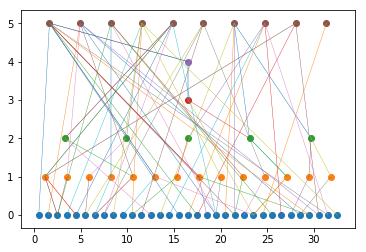

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 1, 6, 2, 1, 1, 2, 2,
       2, 2, 7, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 7, 4, 4, 4, 7, 7, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 6, 2, 6, 6, 2, 7, 7, 7, 6, 7, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 1, 7, 4, 7, 7, 7, 7, 1, 4, 6, 7, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 7, 0, 1, 2, 7, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 6])

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.5166666666666667

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[16  0  0  0  0  0  0  0  0  2]
 [ 0 17  4  8  0  0  1  1  6  1]
 [ 0  1 10 10  0  2  0  0  8 12]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 16  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 10 17  0  1  1]
 [ 0  0  2  0  4  6  0 17  1  2]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


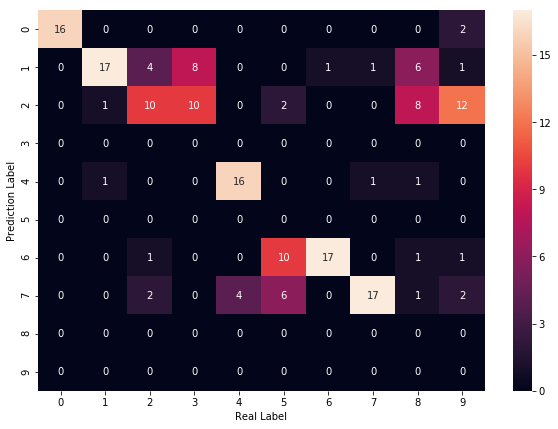

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [19]:
visualize.draw_net(config, winner, prune_unused=False)
visualize.plot_stats(stats, ylog=False, view=False)
visualize.plot_species(stats, view=False)

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [33, 14, 5, 1, 1, 10]


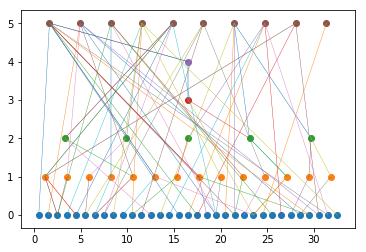

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

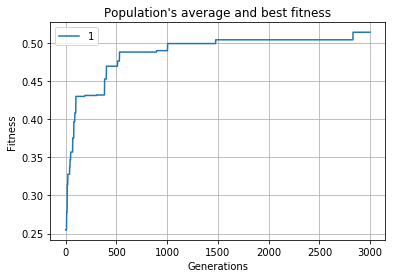

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

length of each layers: [33, 14, 5, 1, 1, 10]
Total nodes:64 Total connections::89
